In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
# Si el CSV tiene encabezados diferentes, ajusta names o usa header=0
df = pd.read_csv(r"C:\Users\Hernan SC\Downloads\beisbol.csv")

df.head()


,Unnamed: 0,equipos,bateos,runs
0,0,Texas,5659,855
1,1,Boston,5710,875
2,2,Detroit,5563,787
3,3,Kansas,5672,730
4,4,St.,5532,762


In [5]:
# Variables
X = df[["bateos"]]
y = df["runs"]

In [6]:
modelo = LinearRegression()
modelo.fit(X, y)

print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)


Coeficientes: [0.63054999]
Intercepto: -2789.242885442254


In [7]:
df["prediccion_runs"] = modelo.predict(X)
df.head()


,Unnamed: 0,equipos,bateos,runs,prediccion_runs
0,0,Texas,5659,855,779.039524
1,1,Boston,5710,875,811.197574
2,2,Detroit,5563,787,718.506725
3,3,Kansas,5672,730,787.236674
4,4,St.,5532,762,698.959675


In [10]:
from math import sqrt

r2 = r2_score(y, df["prediccion_runs"])
rmse = sqrt(mean_squared_error(y, df["prediccion_runs"]))
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")




R²: 0.3729
RMSE: 64.2189


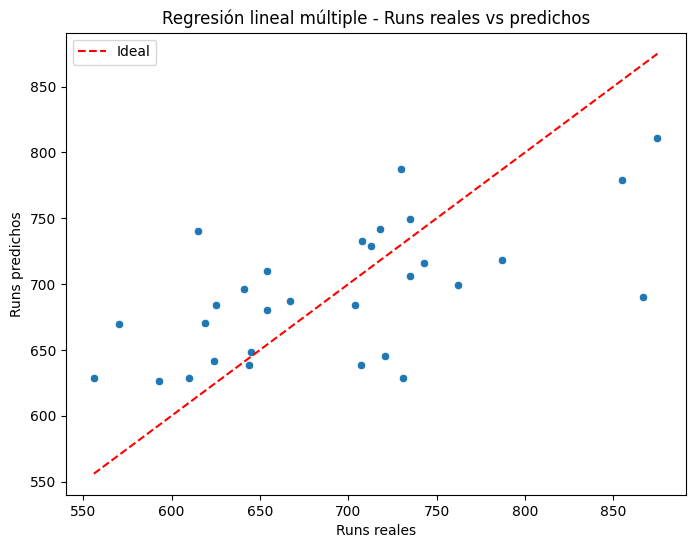

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["runs"], y=df["prediccion_runs"])
plt.plot([df["runs"].min(), df["runs"].max()],
         [df["runs"].min(), df["runs"].max()],
         'r--', label="Ideal")
plt.xlabel("Runs reales")
plt.ylabel("Runs predichos")
plt.title("Regresión lineal múltiple - Runs reales vs predichos")
plt.legend()
plt.show()
